**Multiple Linear Regression.** 

So, what is multiple linear regression? 

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

**Example**: You are a public health researcher interested in social factors that influence heart disease. You survey 500 towns and gather data on the percentage of people in each town who smoke, the percentage of people in each town who bike to work, and the percentage of people in each town who have heart disease.
Because you have two independent variables and one dependent variable, and all your variables are quantitative, you can use multiple linear regression to analyze the relationship between them.

**Assumptions of multiple linear regression**

**1.Homogeneity of variance (homoscedasticity)**: the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

**2.Independence of observations**: the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.

In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

**3. Normality:** The data follows a normal distribution.

**4.Linearity:** the line of best fit through the data points is a straight line, rather than a curve or some sort of grouping factor.

**Multiple linear regression formula**
The formula for a multiple linear regression is


Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e


Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing

X1, X2, X3, ….Xn = Independent variable / Predictor variable

e = Error





**To find the best-fit line for each independent variable, multiple linear regression calculates three things:**

**1.Find The regression coefficients that lead to the smallest overall model error.**

**2.The t-statistic of the overall model.**

**3.Find The associated p-value (how likely it is that the t-statistic would have occurred by chance if the null hypothesis of no relationship between the independent and dependent variables was true).**

**it then calculates the t-statistic and p-value for each regression coefficient in the model.**


***T-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.***

The t-value measures the size of the difference relative to the variation in your sample data.

T-statistic is used when the sample size is less than 30 units or the population standard deviation is unknown.

Formula to calculate t-statistic.
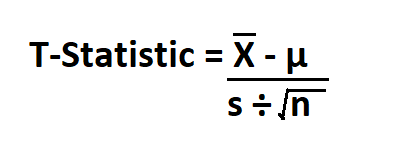

where,

X-bar is the sample mean.

μ is the population mean.

S is the sample standard deviation.

n is the number of units in the sample.

**P-value is the probability that a random chance generated the data or something else that is equal or greater(in some cases less than.)**

P value can be calculated from the p-value table for each associated z/t-score








**Example**

Every company uses multiple channels to market their product. 
Suppose a company has developed some product and needs to make a decision on which marketing channel to use for maximizing its ROI that it makes in marketing. It has used multiple channels to market its product in the past, whose data is available as a csv file.


Predict the sales based on the money spent on TV, Radio, and Newspaper for marketing. In this case, there are three independent variables, i.e., money spent on TV, Radio, and Newspaper for marketing, and one dependent variable, i.e., sales, that is the value to be predicted.


**Problem statement**: Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn: Seaborn is a library used for making statistical graphics of the dataset. It provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It is used to summarize data in visualizations and show the data’s distribution.

In [2]:
#Reading the dataset
dataset = pd.read_csv(r"C:\Users\rishu\Desktop\data\advertising.csv")

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Data Pre-Processing**



In [4]:
dataset.shape

(200, 4)

**1. FInding the missing values**

In [5]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values in the dataset

**Check for Duplicate rows**

In [6]:
dataset.duplicated().any()

False

**Conclusion:** There are no duplicate rows present in the dataset

**3. Checking for outliers**

C:\Users\rishu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rishu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rishu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

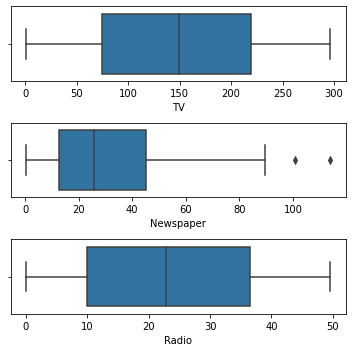

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

**Conclusion:** There are not that extreme values present in the dataset

**Exploratory Data Analysis**

1. 1. Distribution of the target variable

C:\Users\rishu\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

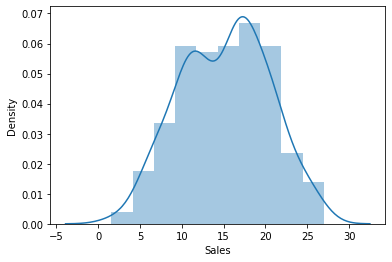

In [8]:
sns.distplot(dataset['Sales'])

**Conclusion: It is normally distributed**



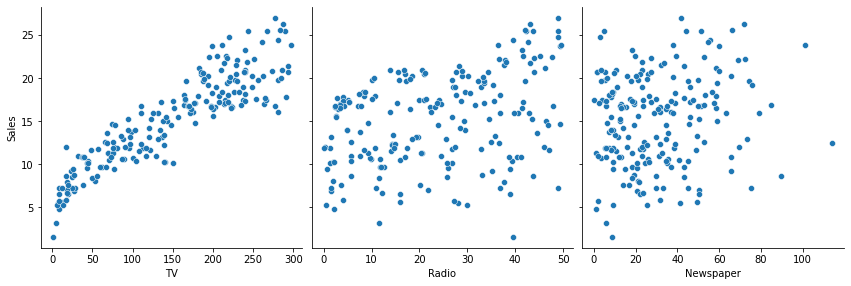

In [9]:
#2. How Sales are related with other variables

sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Conclusion: TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated



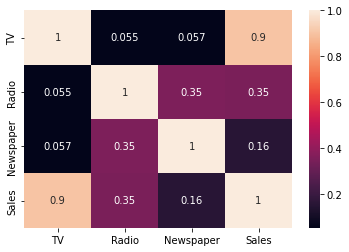

In [10]:
# to better visualize it lets make a heatplot

sns.heatmap(dataset.corr(), annot = True)
plt.show()

Conclusion: TV seems to be most correlated with Sales as 0.9 is very close to 1

**Model Building
Linear Regression is a useful tool for predicting a quantitative response.**

**Prediction using:**

1. Simple Linear Regression
2. Multiple Linear Regression

Simple linear regression has only one x and one y variable. It is an approach for predicting a quantitative response using a single feature.

It establishes the relationship between two variables using a straight line. Linear regression attempts to draw a line that comes closest to the data by finding the slope and intercept that define the line and minimize regression errors.

Formula: Y = β0 + β1X + e

Y = Dependent variable / Target variable
β0 = Intercept of the regression line 
β1 = Slope of the regression lime which tells whether the line is increasing or decreasing
X = Independent variable / Predictor variable
e = Error


In [11]:
# Simple Linear Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [15]:
slr= LinearRegression()  #simple linear regression
slr.fit(x_train, y_train)

LinearRegression()

In [16]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


In [17]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')


Regression Equation: Sales = 6.948 + 0.054 * TV


In [18]:
y_train_predict = slr.predict(x_train)

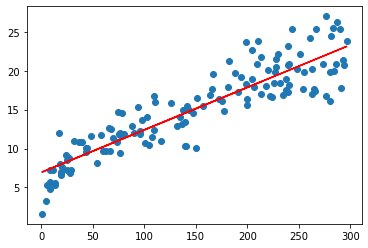

In [19]:
#Line of best fit


plt.scatter(x_train['TV'], y_train)
plt.plot(x_train['TV'].to_list(), y_train_predict, 'r')
plt.show()

In [25]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [21]:
print(y_pred_slr)

[ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [26]:
y_pred_slr.shape


(60,)

In [ ]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

In [ ]:
#Predict for any value
slr.predict([[56]])

Conclusion: The model predicted the Sales of 10.003 in that market

In [ ]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

In [ ]:
# multiple linear regression

#Setting the parameters

#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [ ]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

In [ ]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  

In [ ]:
print("Prediction for test set: ",y_pred_mlr)

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

In [ ]:
#Predict for any value
mlr.predict([[56, 55, 67]])

Conclusion: The model predicted the Sales of 13.82 in that market

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

Conclusion: 90.21% of the data fit the multiple regression model

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)